In [1]:
# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# #IMPORTS

In [2]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))
import pandas as pd
import numpy as np
import string
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
from nltk.corpus import stopwords
from sklearn.utils import resample
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report,confusion_matrix
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import f1_score
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer, TfidfTransformer
from sklearn.naive_bayes import BernoulliNB
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_predict 
import nltk
import re
from nltk.stem.porter import PorterStemmer

# #CODE

In [3]:
df = pd.read_csv(r'train.csv')

# # EDA

In [4]:
df.shape

(653061, 3)

In [5]:
df.columns

Index(['qid', 'question_text', 'target'], dtype='object')

In [6]:
df.head()

qid                                      question_text  \
0  a3dee568776c08512c89                   What is the role of Lua in Civ4?   
1  bdb84f519e7b46e7b7bb  What are important chapters in Kannada for 10 ...   
2  29c88db470e2eb5c97ad           Do musicians get royalties from YouTube?   
3  3387d99bf2c3227ae8f1  What is the difference between Scaling Social ...   
4  e79fa5038f765d0f2e7e  Why do elevators go super slow right before th...   

   target  
0       0  
1       0  
2       0  
3       0  
4       0

In [7]:
df.tail()

qid  \
653056  ad9e82029956889e014e   
653057  a4619bd556d65bf5e52e   
653058  2573a7df05fc8e071aa2   
653059  20e4aeb3ffe5f637ab99   
653060  7e29d8a1f6696b46a52a   

                                            question_text  target  
653056  Which coaching centre is best in Delhi for IAS...       0  
653057  Is their any API to check CIBIL score and down...       0  
653058  In paranormal shows, why do spirits talk to me...       0  
653059  How does Josh Gordon have such well developed ...       0  
653060         In how many ways methane can be extracted?       0

In [8]:
df.describe()

target
count  653061.00000
mean        0.06187
std         0.24092
min         0.00000
25%         0.00000
50%         0.00000
75%         0.00000
max         1.00000

In [9]:
df.nunique()

qid              653061
question_text    653061
target                2
dtype: int64

In [10]:
df.groupby('target').describe()

qid                                    question_text          \
         count  unique                   top freq         count  unique   
target                                                                    
0       612656  612656  a3dee568776c08512c89    1        612656  612656   
1        40405   40405  19af3f158b9e37398746    1         40405   40405   

                                                                
                                                      top freq  
target                                                          
0                        What is the role of Lua in Civ4?    1  
1       What stupid things do Indians do when in your ...    1

0    612656
1     40405
Name: target, dtype: int64


C:\Users\fahed\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'Histogram Representation')

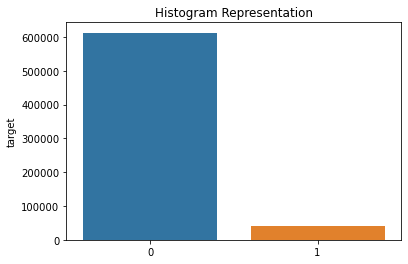

In [11]:
x = df['target'].value_counts()

print(x)

sns.barplot(x.index, x)
plt.title("Histogram Representation")

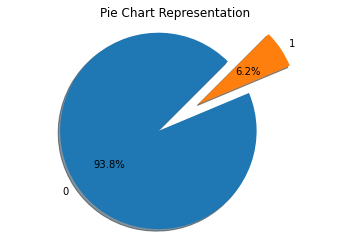

In [12]:
explode = (0.1, 0.4)

fig, ax = plt.subplots()
ax.pie(x,
       explode=explode,
       labels=x.index,
       autopct='%1.1f%%',
       shadow=True,
       startangle=45)
ax.axis('equal')  # Equal aspect ratio ensures the pie chart is circular.
ax.set_title('Pie Chart Representation')


plt.show()

In [13]:
df["length"] = df["question_text"].apply(len)
df.sort_values(by = "length", ascending = True).head(10)

qid question_text  target  length
306520  527aac2ce6f12f789fe5             "       1       1
241825  3a9ae962f1094242e36f           If        1       3
644893  0f5a41d6752d5d667895           Is        1       3
333070  2cfd7dec2231e47afd6c         I 12?       0       5
334296  0c2a113858db20e0a4db       Quora:        1       7
580505  4a5c932c3b57957e71c8       Islam:        1       7
606611  6adc80c68b1f75e4540e       India:        1       7
237431  1e52e57a821c597eee0c       Dowry:        1       7
532195  83d01336b3406133723e      Bye Bye?       1       8
73729   955bcd9278b7810cd39a      Incest:        1       8

In [14]:
fig = px.histogram(df, x="length", color="target", color_discrete_sequence=["Green","Red"] )
fig.show()

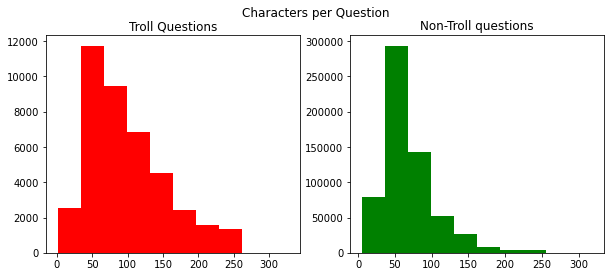

In [15]:
fig,(ax1,ax2)=plt.subplots(1,2,figsize=(10,4))

train_words=df[df['target']==1]['length']

ax1.hist(train_words,color='red')

ax1.set_title('Troll Questions')

train_words=df[df['target']==0]['length']

ax2.hist(train_words,color='green')

ax2.set_title('Non-Troll questions')

fig.suptitle('Characters per Question')

plt.show()

In [16]:
df.isna().sum()

qid              0
question_text    0
target           0
length           0
dtype: int64

In [17]:
df['word_count'] = df['question_text'].apply(lambda x: len(str(x).split()))

print(df[df['target'] == 1]['word_count'].mean())

print(df[df['target'] == 0]['word_count'].mean())

17.283059027348102
12.505327622678958


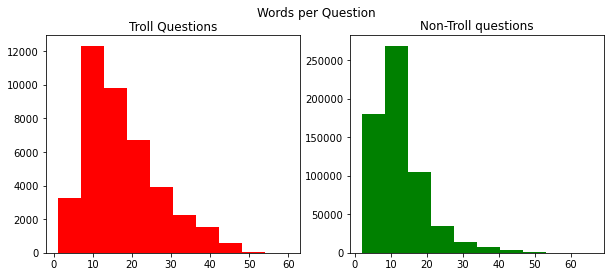

In [18]:
#Plotting Word Count

fig,(ax1,ax2)=plt.subplots(1,2,figsize=(10,4))

train_words=df[df['target']==1]['word_count']

ax1.hist(train_words,color='Red')

ax1.set_title('Troll Questions')

train_words=df[df['target']==0]['word_count']

ax2.hist(train_words,color='Green')

ax2.set_title('Non-Troll questions')

fig.suptitle('Words per Question')

plt.show()

In [19]:
#Character Count

df['char_count'] = df['question_text'].apply(lambda x: len(str(x)))

print(df[df['target']==1]['char_count'].mean()) #Troll questions

print(df[df['target']==0]['char_count'].mean()) #Non-Troll questions

98.07437198366539
68.86373593011413


# # TEXT PROCESSING

In [20]:
import re

def Tokenize(question):
    question = re.sub("[^a-zA-Z]", " ", question)
    Tokens = nltk.word_tokenize(question)
    return Tokens

df["Tokenized"] = df["question_text"].apply(lambda j: Tokenize(j))
df.head()

qid                                      question_text  \
0  a3dee568776c08512c89                   What is the role of Lua in Civ4?   
1  bdb84f519e7b46e7b7bb  What are important chapters in Kannada for 10 ...   
2  29c88db470e2eb5c97ad           Do musicians get royalties from YouTube?   
3  3387d99bf2c3227ae8f1  What is the difference between Scaling Social ...   
4  e79fa5038f765d0f2e7e  Why do elevators go super slow right before th...   

   target  length  word_count  char_count  \
0       0      32           8          32   
1       0      56          10          56   
2       0      40           6          40   
3       0      81          11          81   
4       0      59          11          59   

                                           Tokenized  
0            [What, is, the, role, of, Lua, in, Civ]  
1  [What, are, important, chapters, in, Kannada, ...  
2     [Do, musicians, get, royalties, from, YouTube]  
3  [What, is, the, difference, between, Scaling, ...  
4  [Why, do, elevators, go, super, slow, right, b...

In [21]:
df['Lower Case'] = df['Tokenized'].apply(lambda s: [word.lower() for word in s])
df.head()

qid                                      question_text  \
0  a3dee568776c08512c89                   What is the role of Lua in Civ4?   
1  bdb84f519e7b46e7b7bb  What are important chapters in Kannada for 10 ...   
2  29c88db470e2eb5c97ad           Do musicians get royalties from YouTube?   
3  3387d99bf2c3227ae8f1  What is the difference between Scaling Social ...   
4  e79fa5038f765d0f2e7e  Why do elevators go super slow right before th...   

   target  length  word_count  char_count  \
0       0      32           8          32   
1       0      56          10          56   
2       0      40           6          40   
3       0      81          11          81   
4       0      59          11          59   

                                           Tokenized  \
0            [What, is, the, role, of, Lua, in, Civ]   
1  [What, are, important, chapters, in, Kannada, ...   
2     [Do, musicians, get, royalties, from, YouTube]   
3  [What, is, the, difference, between, Scaling, ...   
4  [Why, do, elevators, go, super, slow, right, b...   

                                          Lower Case  
0            [what, is, the, role, of, lua, in, civ]  
1  [what, are, important, chapters, in, kannada, ...  
2     [do, musicians, get, royalties, from, youtube]  
3  [what, is, the, difference, between, scaling, ...  
4  [why, do, elevators, go, super, slow, right, b...

In [22]:
Unwanted = set(stopwords.words('english'))
#Unwanted = nltk.corpus.stopwords.words("english")

def RemoveStopWords(Tokens):
    NoStopWords = [word for word in Tokens if word not in Unwanted]
    return NoStopWords

df["Removed StopWords"] = df["Lower Case"].apply(lambda k: RemoveStopWords(k))
df.head()

qid                                      question_text  \
0  a3dee568776c08512c89                   What is the role of Lua in Civ4?   
1  bdb84f519e7b46e7b7bb  What are important chapters in Kannada for 10 ...   
2  29c88db470e2eb5c97ad           Do musicians get royalties from YouTube?   
3  3387d99bf2c3227ae8f1  What is the difference between Scaling Social ...   
4  e79fa5038f765d0f2e7e  Why do elevators go super slow right before th...   

   target  length  word_count  char_count  \
0       0      32           8          32   
1       0      56          10          56   
2       0      40           6          40   
3       0      81          11          81   
4       0      59          11          59   

                                           Tokenized  \
0            [What, is, the, role, of, Lua, in, Civ]   
1  [What, are, important, chapters, in, Kannada, ...   
2     [Do, musicians, get, royalties, from, YouTube]   
3  [What, is, the, difference, between, Scaling, ...   
4  [Why, do, elevators, go, super, slow, right, b...   

                                          Lower Case  \
0            [what, is, the, role, of, lua, in, civ]   
1  [what, are, important, chapters, in, kannada, ...   
2     [do, musicians, get, royalties, from, youtube]   
3  [what, is, the, difference, between, scaling, ...   
4  [why, do, elevators, go, super, slow, right, b...   

                                   Removed StopWords  
0                                   [role, lua, civ]  
1               [important, chapters, kannada, icse]  
2               [musicians, get, royalties, youtube]  
3  [difference, scaling, social, enterprises, soc...  
4   [elevators, go, super, slow, right, doors, open]

In [23]:
ps = nltk.PorterStemmer()

def stemming(SmallCaps):
    stem = [ps.stem(word) for word in SmallCaps]
    return stem

df["Stemmed Text"] = df["Removed StopWords"].apply(lambda st: stemming(st))
df.head()

qid                                      question_text  \
0  a3dee568776c08512c89                   What is the role of Lua in Civ4?   
1  bdb84f519e7b46e7b7bb  What are important chapters in Kannada for 10 ...   
2  29c88db470e2eb5c97ad           Do musicians get royalties from YouTube?   
3  3387d99bf2c3227ae8f1  What is the difference between Scaling Social ...   
4  e79fa5038f765d0f2e7e  Why do elevators go super slow right before th...   

   target  length  word_count  char_count  \
0       0      32           8          32   
1       0      56          10          56   
2       0      40           6          40   
3       0      81          11          81   
4       0      59          11          59   

                                           Tokenized  \
0            [What, is, the, role, of, Lua, in, Civ]   
1  [What, are, important, chapters, in, Kannada, ...   
2     [Do, musicians, get, royalties, from, YouTube]   
3  [What, is, the, difference, between, Scaling, ...   
4  [Why, do, elevators, go, super, slow, right, b...   

                                          Lower Case  \
0            [what, is, the, role, of, lua, in, civ]   
1  [what, are, important, chapters, in, kannada, ...   
2     [do, musicians, get, royalties, from, youtube]   
3  [what, is, the, difference, between, scaling, ...   
4  [why, do, elevators, go, super, slow, right, b...   

                                   Removed StopWords  \
0                                   [role, lua, civ]   
1               [important, chapters, kannada, icse]   
2               [musicians, get, royalties, youtube]   
3  [difference, scaling, social, enterprises, soc...   
4   [elevators, go, super, slow, right, doors, open]   

                                        Stemmed Text  
0                                   [role, lua, civ]  
1                    [import, chapter, kannada, ics]  
2                   [musician, get, royalti, youtub]  
3  [differ, scale, social, enterpris, social, fra...  
4         [elev, go, super, slow, right, door, open]

In [24]:
wnl = nltk.WordNetLemmatizer()

def Lemmatizing(stemmed):
    lemm = [wnl.lemmatize(word) for word in stemmed]
    string = ""
    for s in lemm:
        string = string + ' ' + s
    return string
    

df["Lemmatized Text"] = df["Stemmed Text"].apply(lambda lm: Lemmatizing(lm))
df.head()

qid                                      question_text  \
0  a3dee568776c08512c89                   What is the role of Lua in Civ4?   
1  bdb84f519e7b46e7b7bb  What are important chapters in Kannada for 10 ...   
2  29c88db470e2eb5c97ad           Do musicians get royalties from YouTube?   
3  3387d99bf2c3227ae8f1  What is the difference between Scaling Social ...   
4  e79fa5038f765d0f2e7e  Why do elevators go super slow right before th...   

   target  length  word_count  char_count  \
0       0      32           8          32   
1       0      56          10          56   
2       0      40           6          40   
3       0      81          11          81   
4       0      59          11          59   

                                           Tokenized  \
0            [What, is, the, role, of, Lua, in, Civ]   
1  [What, are, important, chapters, in, Kannada, ...   
2     [Do, musicians, get, royalties, from, YouTube]   
3  [What, is, the, difference, between, Scaling, ...   
4  [Why, do, elevators, go, super, slow, right, b...   

                                          Lower Case  \
0            [what, is, the, role, of, lua, in, civ]   
1  [what, are, important, chapters, in, kannada, ...   
2     [do, musicians, get, royalties, from, youtube]   
3  [what, is, the, difference, between, scaling, ...   
4  [why, do, elevators, go, super, slow, right, b...   

                                   Removed StopWords  \
0                                   [role, lua, civ]   
1               [important, chapters, kannada, icse]   
2               [musicians, get, royalties, youtube]   
3  [difference, scaling, social, enterprises, soc...   
4   [elevators, go, super, slow, right, doors, open]   

                                        Stemmed Text  \
0                                   [role, lua, civ]   
1                    [import, chapter, kannada, ics]   
2                   [musician, get, royalti, youtub]   
3  [differ, scale, social, enterpris, social, fra...   
4         [elev, go, super, slow, right, door, open]   

                                  Lemmatized Text  
0                                    role lua civ  
1                       import chapter kannada ic  
2                     musician get royalti youtub  
3   differ scale social enterpris social franchis  
4              elev go super slow right door open

In [25]:
df['question_text'] = df['Lemmatized Text']
df =df.drop('qid', 1)
df =df.drop('Tokenized', 1)
df =df.drop('Lower Case', 1)
df =df.drop('Removed StopWords', 1)
df =df.drop('Stemmed Text', 1)
df =df.drop('Lemmatized Text', 1)

C:\Users\fahed\AppData\Local\Temp/ipykernel_21980/2154615808.py:2: FutureWarning:

In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only

C:\Users\fahed\AppData\Local\Temp/ipykernel_21980/2154615808.py:3: FutureWarning:

In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only

C:\Users\fahed\AppData\Local\Temp/ipykernel_21980/2154615808.py:4: FutureWarning:

In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only

C:\Users\fahed\AppData\Local\Temp/ipykernel_21980/2154615808.py:5: FutureWarning:

In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only

C:\Users\fahed\AppData\Local\Temp/ipykernel_21980/2154615808.py:6: FutureWarning:

In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only



In [161]:
qt = df['question_text'] 
target = df['target']

In [ ]:
#get all words from spam and non-spam datasets
train_spam_words = ' '.join(df[df.target == True].question_text).split(' ')
train_non_spam_words = ' '.join(df[df.target == False].question_text).split(' ')

common_words = set(train_spam_words).intersection(set(train_non_spam_words))

In [27]:
df

question_text  target  length  \
0                                            role lua civ       0      32   
1                               import chapter kannada ic       0      56   
2                             musician get royalti youtub       0      40   
3           differ scale social enterpris social franchis       0      81   
4                      elev go super slow right door open       0      59   
...                                                   ...     ...     ...   
653056                   coach centr best delhi ia prepar       0      59   
653057   api check cibil score download credit report ...       0      74   
653058   paranorm show spirit talk medium use imag ins...       0      82   
653059                        josh gordon well develop ab       0      50   
653060                            mani way methan extract       0      42   

        word_count  char_count  
0                8          32  
1               10          56  
2                6          40  
3               11          81  
4               11          59  
...            ...         ...  
653056          10          59  
653057          14          74  
653058          14          82  
653059           9          50  
653060           8          42  

[653061 rows x 5 columns]

In [28]:
ones = df[df.target == 1]
zeroes = df[df.target == 0]

In [29]:
len(zeroes)

612656

In [30]:
len(ones)

40405

## RESAMPLING

In [31]:
from sklearn.utils import resample

balanced_df = pd.concat([resample(zeroes, replace=True, n_samples=len(ones)), ones])

0    40405
1    40405
Name: target, dtype: int64


C:\Users\fahed\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



Text(0.5, 1.0, 'Histogram Representation')

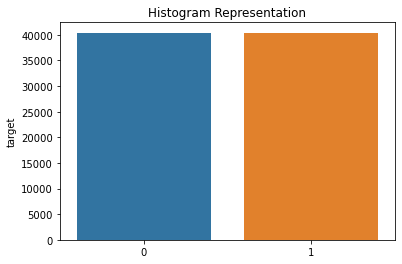

In [32]:
x = balanced_df['target'].value_counts()

print(x)

sns.barplot(x.index, x)
plt.title("Histogram Representation")

In [33]:
balanced_df

question_text  target  length  \
274442                        aftermath sink rm lusitania       0      59   
457865                         safe carri lpg cylind elev       0      48   
647862                                       use protocol       0      29   
472028     industri design motorcycl protect shield cover       0      75   
550800   salari aircraft maintan engin ame dgca certif...       0      98   
...                                                   ...     ...     ...   
652967        liber understand differ pollut climat chang       1      89   
653021   unattract averag look men ever get girlfriend...       1     144   
653029                                  grab aunti boob p       1      36   
653034                       girl like treat like sex toy       1      43   
653049   liber also concern lot quora question phrase ...       1     138   

        word_count  char_count  
274442          11          59  
457865          10          48  
647862           6          29  
472028          10          75  
550800          16          98  
...            ...         ...  
652967          13          89  
653021          25         144  
653029           8          36  
653034           9          43  
653049          23         138  

[80810 rows x 5 columns]

In [194]:
X =balanced_df["question_text"]
y = balanced_df["target"]

# # Bag Of Words

In [35]:
FRAC_troll_TEXTS = balanced_df.target.mean()

In [36]:
#get all words from troll and non-troll datasets
train_troll_words = ' '.join(balanced_df[balanced_df.target == True].question_text).split(' ')
train_non_troll_words = ' '.join(balanced_df[balanced_df.target == False].question_text).split(' ')

common_words = set(train_troll_words).intersection(set(train_non_troll_words))

In [37]:
train_troll_bow = dict()
for w in common_words:
    train_troll_bow[w] = train_troll_words.count(w) / len(train_troll_words)

train_non_troll_bow = dict()
for w in common_words:
    train_non_troll_bow[w] = train_non_troll_words.count(w) / len(train_non_troll_words)

In [38]:
    # valid_words = [w for w in t if w in train_troll_bow]
    
    # #get the probabilities of each valid word showing up in troll and non-troll BOW
    # troll_probs = [train_troll_bow[w] for w in valid_words]
    # non_troll_probs = [train_non_troll_bow[w] for w in valid_words]

In [39]:
# troll_score = sum([np.log(p) for p in troll_probs]) + np.log(FRAC_troll_TEXTS)
# non_troll_score = sum([np.log(p) for p in non_troll_probs]) + np.log(1-FRAC_troll_TEXTS)

# # Vectorizer

In [220]:
vectorizer = CountVectorizer(max_features=1000)

In [221]:
X = vectorizer.fit_transform(balanced_df.question_text.tolist())
qt = vectorizer.fit_transform(df.question_text.tolist())

# #Logistic MODEL.

In [215]:
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import f1_score
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer, TfidfTransformer
from sklearn.naive_bayes import BernoulliNB
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_predict 

In [216]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.25, random_state= 0)

In [203]:
# pipeline_model = Pipeline([('vect', CountVectorizer()), ('tfidf', TfidfTransformer()), ('clf', SVC())])
# pipeline_model = Pipeline([('vect', CountVectorizer()), ('tfidf', TfidfTransformer()), ('clf', MultinomialNB())])

In [217]:
pipeline_model = LogisticRegression(class_weight = 'balanced', max_iter=1000, solver="lbfgs", penalty="l2")

In [218]:
pipeline_model.fit(X_train, y_train)

LogisticRegression(class_weight='balanced', max_iter=1000)

In [219]:
y_pred = pipeline_model.predict(X_test)
f1_score(y_test, y_pred, average='macro') 

0.8523551035595869

TEST DATA

In [107]:
db = pd.read_csv(r'test.csv')
db.head()

qid                                      question_text
0  0a824224322f0a36025f                     Why is my fish tank so cloudy?
1  28af14c4e4777ce1273e             Are AAP supporters/leaders hypocrites?
2  6892a52c51103dd95044  Can you still get a ticket if you shut off you...
3  badd9e8886d73fc1fe4e  Why should any liberal or caring person want t...
4  4ef178f82a465e4804ae   How can I know who got into my PC using anydesk?

In [108]:
db["Tokenized"] = db["question_text"].apply(lambda j: Tokenize(j))
db.head()

qid                                      question_text  \
0  0a824224322f0a36025f                     Why is my fish tank so cloudy?   
1  28af14c4e4777ce1273e             Are AAP supporters/leaders hypocrites?   
2  6892a52c51103dd95044  Can you still get a ticket if you shut off you...   
3  badd9e8886d73fc1fe4e  Why should any liberal or caring person want t...   
4  4ef178f82a465e4804ae   How can I know who got into my PC using anydesk?   

                                           Tokenized  
0              [Why, is, my, fish, tank, so, cloudy]  
1        [Are, AAP, supporters, leaders, hypocrites]  
2  [Can, you, still, get, a, ticket, if, you, shu...  
3  [Why, should, any, liberal, or, caring, person...  
4  [How, can, I, know, who, got, into, my, PC, us...

In [109]:
db['Lower Case'] = db['Tokenized'].apply(lambda s: [word.lower() for word in s])
db.head()

qid                                      question_text  \
0  0a824224322f0a36025f                     Why is my fish tank so cloudy?   
1  28af14c4e4777ce1273e             Are AAP supporters/leaders hypocrites?   
2  6892a52c51103dd95044  Can you still get a ticket if you shut off you...   
3  badd9e8886d73fc1fe4e  Why should any liberal or caring person want t...   
4  4ef178f82a465e4804ae   How can I know who got into my PC using anydesk?   

                                           Tokenized  \
0              [Why, is, my, fish, tank, so, cloudy]   
1        [Are, AAP, supporters, leaders, hypocrites]   
2  [Can, you, still, get, a, ticket, if, you, shu...   
3  [Why, should, any, liberal, or, caring, person...   
4  [How, can, I, know, who, got, into, my, PC, us...   

                                          Lower Case  
0              [why, is, my, fish, tank, so, cloudy]  
1        [are, aap, supporters, leaders, hypocrites]  
2  [can, you, still, get, a, ticket, if, you, shu...  
3  [why, should, any, liberal, or, caring, person...  
4  [how, can, i, know, who, got, into, my, pc, us...

In [110]:
db["Removed StopWords"] = db["Lower Case"].apply(lambda k: RemoveStopWords(k))
db.head()

qid                                      question_text  \
0  0a824224322f0a36025f                     Why is my fish tank so cloudy?   
1  28af14c4e4777ce1273e             Are AAP supporters/leaders hypocrites?   
2  6892a52c51103dd95044  Can you still get a ticket if you shut off you...   
3  badd9e8886d73fc1fe4e  Why should any liberal or caring person want t...   
4  4ef178f82a465e4804ae   How can I know who got into my PC using anydesk?   

                                           Tokenized  \
0              [Why, is, my, fish, tank, so, cloudy]   
1        [Are, AAP, supporters, leaders, hypocrites]   
2  [Can, you, still, get, a, ticket, if, you, shu...   
3  [Why, should, any, liberal, or, caring, person...   
4  [How, can, I, know, who, got, into, my, PC, us...   

                                          Lower Case  \
0              [why, is, my, fish, tank, so, cloudy]   
1        [are, aap, supporters, leaders, hypocrites]   
2  [can, you, still, get, a, ticket, if, you, shu...   
3  [why, should, any, liberal, or, caring, person...   
4  [how, can, i, know, who, got, into, my, pc, us...   

                                   Removed StopWords  
0                               [fish, tank, cloudy]  
1             [aap, supporters, leaders, hypocrites]  
2  [still, get, ticket, shut, car, cop, flips, li...  
3  [liberal, caring, person, want, stay, country,...  
4                    [know, got, pc, using, anydesk]

In [111]:
db["Stemmed Text"] = db["Removed StopWords"].apply(lambda st: stemming(st))
db.head()

qid                                      question_text  \
0  0a824224322f0a36025f                     Why is my fish tank so cloudy?   
1  28af14c4e4777ce1273e             Are AAP supporters/leaders hypocrites?   
2  6892a52c51103dd95044  Can you still get a ticket if you shut off you...   
3  badd9e8886d73fc1fe4e  Why should any liberal or caring person want t...   
4  4ef178f82a465e4804ae   How can I know who got into my PC using anydesk?   

                                           Tokenized  \
0              [Why, is, my, fish, tank, so, cloudy]   
1        [Are, AAP, supporters, leaders, hypocrites]   
2  [Can, you, still, get, a, ticket, if, you, shu...   
3  [Why, should, any, liberal, or, caring, person...   
4  [How, can, I, know, who, got, into, my, PC, us...   

                                          Lower Case  \
0              [why, is, my, fish, tank, so, cloudy]   
1        [are, aap, supporters, leaders, hypocrites]   
2  [can, you, still, get, a, ticket, if, you, shu...   
3  [why, should, any, liberal, or, caring, person...   
4  [how, can, i, know, who, got, into, my, pc, us...   

                                   Removed StopWords  \
0                               [fish, tank, cloudy]   
1             [aap, supporters, leaders, hypocrites]   
2  [still, get, ticket, shut, car, cop, flips, li...   
3  [liberal, caring, person, want, stay, country,...   
4                    [know, got, pc, using, anydesk]   

                                        Stemmed Text  
0                               [fish, tank, cloudi]  
1                   [aap, support, leader, hypocrit]  
2  [still, get, ticket, shut, car, cop, flip, light]  
3  [liber, care, person, want, stay, countri, nin...  
4                      [know, got, pc, use, anydesk]

In [112]:
db["Lemmatized Text"] = db["Stemmed Text"].apply(lambda lm: Lemmatizing(lm))
db.head()

qid                                      question_text  \
0  0a824224322f0a36025f                     Why is my fish tank so cloudy?   
1  28af14c4e4777ce1273e             Are AAP supporters/leaders hypocrites?   
2  6892a52c51103dd95044  Can you still get a ticket if you shut off you...   
3  badd9e8886d73fc1fe4e  Why should any liberal or caring person want t...   
4  4ef178f82a465e4804ae   How can I know who got into my PC using anydesk?   

                                           Tokenized  \
0              [Why, is, my, fish, tank, so, cloudy]   
1        [Are, AAP, supporters, leaders, hypocrites]   
2  [Can, you, still, get, a, ticket, if, you, shu...   
3  [Why, should, any, liberal, or, caring, person...   
4  [How, can, I, know, who, got, into, my, PC, us...   

                                          Lower Case  \
0              [why, is, my, fish, tank, so, cloudy]   
1        [are, aap, supporters, leaders, hypocrites]   
2  [can, you, still, get, a, ticket, if, you, shu...   
3  [why, should, any, liberal, or, caring, person...   
4  [how, can, i, know, who, got, into, my, pc, us...   

                                   Removed StopWords  \
0                               [fish, tank, cloudy]   
1             [aap, supporters, leaders, hypocrites]   
2  [still, get, ticket, shut, car, cop, flips, li...   
3  [liberal, caring, person, want, stay, country,...   
4                    [know, got, pc, using, anydesk]   

                                        Stemmed Text  \
0                               [fish, tank, cloudi]   
1                   [aap, support, leader, hypocrit]   
2  [still, get, ticket, shut, car, cop, flip, light]   
3  [liber, care, person, want, stay, countri, nin...   
4                      [know, got, pc, use, anydesk]   

                                     Lemmatized Text  
0                                   fish tank cloudi  
1                        aap support leader hypocrit  
2           still get ticket shut car cop flip light  
3   liber care person want stay countri nine mont...  
4                            know got pc use anydesk

In [207]:
db_X = db['Lemmatized Text']
db_X.shape

(653061,)

In [208]:
Xdb_X = vectorizer.fit_transform(db_X.tolist())
Xdb_X.shape

(653061, 1000)

In [209]:
X_train.shape

(60607,)

In [210]:
pipeline_model.fit(qt, target)

LogisticRegression(class_weight='balanced', max_iter=1000)

In [211]:
result = pipeline_model.predict(Xdb_X)

In [212]:
db["target"] = result

to_submit = db[['qid',"target"]]

to_submit.to_csv("submission.csv", index = False)

In [213]:
to_submit["target"].value_counts()

0    551058
1    102003
Name: target, dtype: int64